<a href="https://colab.research.google.com/github/jeyanthi492/ML-projects/blob/main/Engine%20energy%20prediction/Engine%20energy%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Model selection for Engine energy prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

# AT - Ambient Temparature(in 'C)
# EV - Exhaust Vacuum( in cm Hg)
# AP - Ambient Pressure(in millibar)
# RH - Relative Humidity (in %)
# PE - Net hourly electrical energy output (in MW)

Saving Engine energy.csv to Engine energy.csv


In [ ]:
dataset = pd.read_csv('Engine energy.csv')
dataset.head()

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
ysvm = y.reshape(len(y),1) #vertical

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [ ]:
modelLR = LinearRegression()

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
modelPLR = LinearRegression()

modelRFR = RandomForestRegressor(n_estimators = 10, random_state = 0)

modelDTR = DecisionTreeRegressor(random_state = 0)

modelSVR = SVR(kernel = 'rbf')


In [ ]:
modelLR.fit(X_train, y_train)
modelPLR.fit(X_poly, y_train)
modelRFR.fit(X_train, y_train)
modelDTR.fit(X_train, y_train)
modelSVR.fit(X_train, y_train)

SVR()

In [ ]:
modelLRy_pred = modelLR.predict(X_test)
modelPLRy_pred = modelPLR.predict(poly_reg.transform(X_test))
modelRFRy_pred = modelRFR.predict(X_test)
modelDTRy_pred = modelDTR.predict(X_test)
modelSVRy_pred = modelSVR.predict(X_test)

In [ ]:
#Model Evaluation
from sklearn.metrics import r2_score
print("Linear Regression Accuracy : {}".format(r2_score(y_test, modelLRy_pred)))
print("Polynomial Regression Accuracy : {}".format(r2_score(y_test, modelPLRy_pred)))
print("Random Forest Regression Accuracy : {}".format(r2_score(y_test, modelRFRy_pred)))
print("Decision Tree Regression Accuracy : {}".format(r2_score(y_test, modelDTRy_pred)))
print("Support Vector Regression Accuracy : {}".format(r2_score(y_test, modelSVR.predict(X_test))))


Linear Regression Accuracy : 0.9247691232656607
Polynomial Regression Accuracy : 0.9352473845792977
Random Forest Regression Accuracy : 0.9529988650807741
Decision Tree Regression Accuracy : 0.922270351196369
Support Vector Regression Accuracy : 0.263285778379331


In [ ]:
#Model prediction
AT = float(input("Enter Ambient Temparature : "))
EV = float(input("Enter Exhaust Vacuum : "))
AP = float(input("Enter Ambient Pressure : "))
RH = float(input("Enter Relative Humidity : "))

user_ip = np.array([[AT, EV, AP, RH]])
Output = modelRFR.predict(user_ip)
print("Net hourly electrical energy output : {}".format(Output[0]))

# 29.95	73.42	1011.44	66.32	432.81

user_ip = ([[AT, EV, AP, RH]])
Output = modelRFR.predict(user_ip)
print("Net hourly electrical energy output : {}".format(Output))

Enter Ambient Temparature : 29.95
Enter Exhaust Vacuum : 73.42
Enter Ambient Pressure : 1011.44
Enter Relative Humidity : 66.32
Net hourly electrical energy output : 432.85900000000004
Net hourly electrical energy output : [432.859]


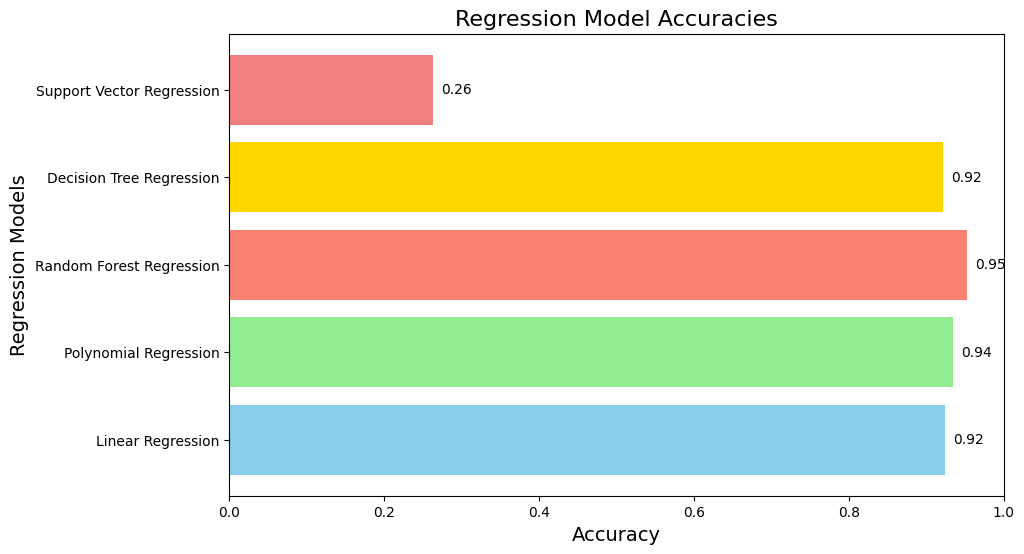

In [ ]:
#Chat gpt code
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest Regression', 'Decision Tree Regression', 'Support Vector Regression']
accuracies = [0.9247691232656607, 0.9352473845792977, 0.9529988650807741, 0.922270351196369, 0.263285778379331]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral'])

# Adding titles and labels
plt.title('Regression Model Accuracies', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Regression Models', fontsize=14)

# Displaying accuracy values on bars
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

# Display the plot
plt.show()


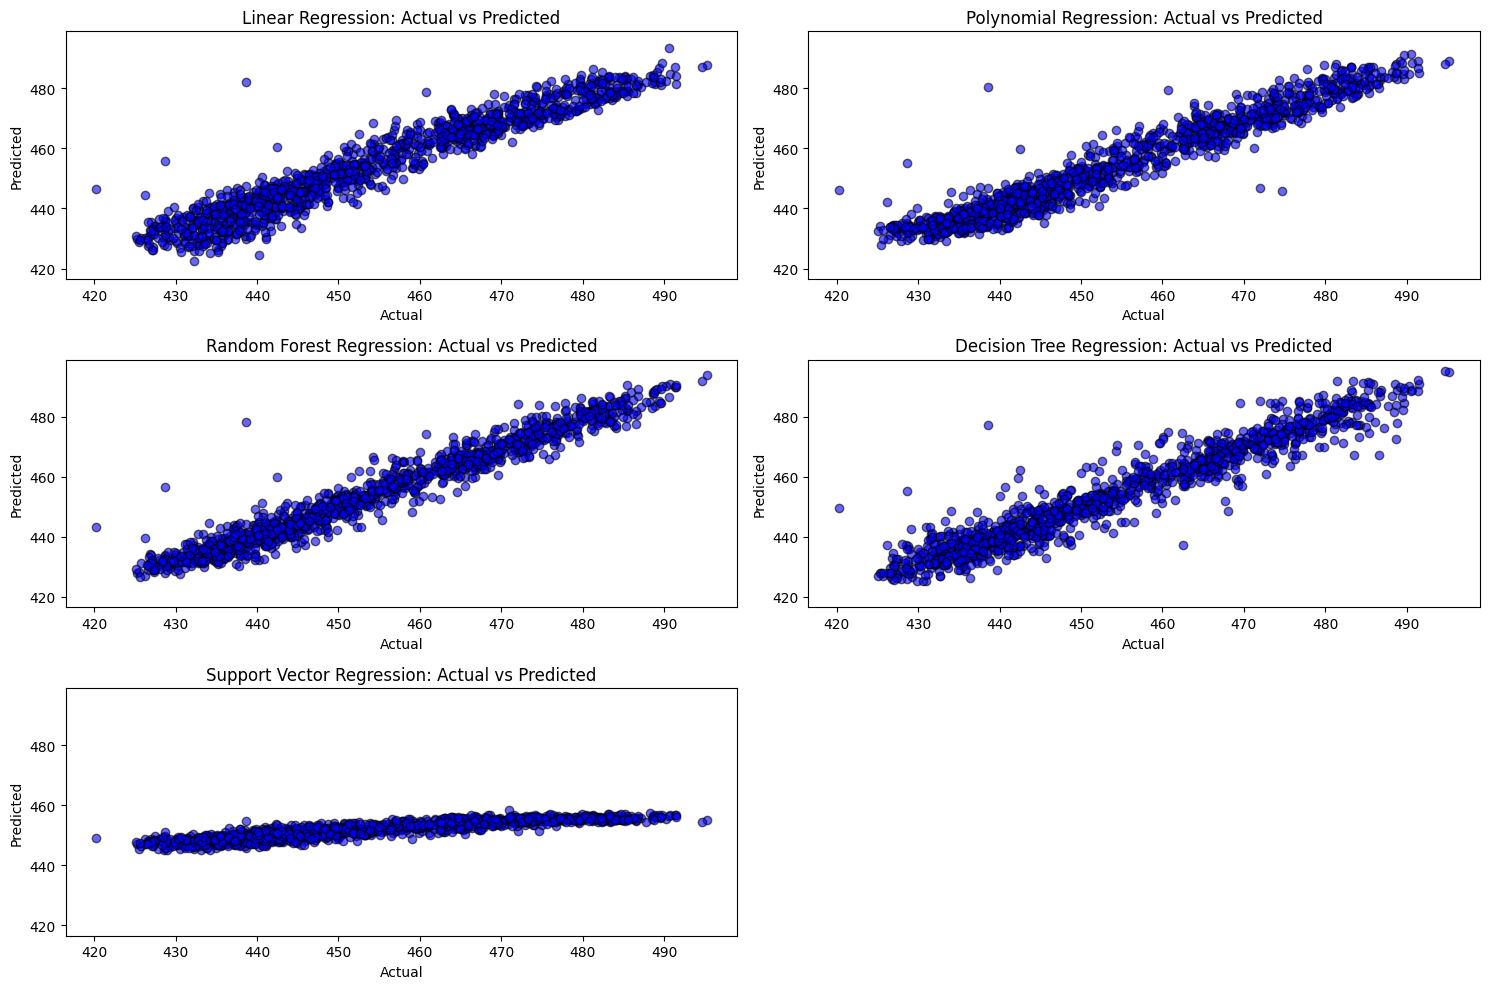

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example y_test and y_pred for all algorithms (replace these with your actual data)
# Assuming y_test is the same for all models
y_test = np.array([y_test])  # replace with actual y_test
y_pred_linear = np.array([modelLRy_pred])  # Linear Regression predictions
y_pred_poly = np.array([modelPLRy_pred])      # Polynomial Regression predictions
y_pred_rf = np.array([modelRFRy_pred])          # Random Forest predictions
y_pred_dt = np.array([modelDTRy_pred])          # Decision Tree predictions
y_pred_svr = np.array([modelSVRy_pred])        # Support Vector Regression predictions

# Create a list of model names and their corresponding predictions
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest Regression', 'Decision Tree Regression', 'Support Vector Regression']
y_preds = [y_pred_linear, y_pred_poly, y_pred_rf, y_pred_dt, y_pred_svr]

# Plotting
plt.figure(figsize=(15, 10))

for i, y_pred in enumerate(y_preds):
    plt.subplot(3, 2, i+1)  # Create a subplot for each model
    plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line for perfect prediction
    plt.title(f'{models[i]}: Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

# Adjust layout
plt.tight_layout()
plt.show()
